# Nonparallelized 2D Atrial Fibrillation - 3 Variable Model

In [52]:
import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit
from PIL import Image
import imageio
# import cv2 as cv

if 'nb_dir' not in globals():
    nb_dir = os.getcwd()

width = 512
height = 512
channel_no = 3

from lib.minimal_model import *
from lib.TexturePlot import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)

# initialize the buffer in a reproducible way 
*and save as a .jpg for later*<br>
The buffer has three channels for the three variable model
- gimage[...,0] denotes the transmembrane voltage 
- gimage[...,1] denotes the fast variable
- gimage[...,2] denotes the slow variable 

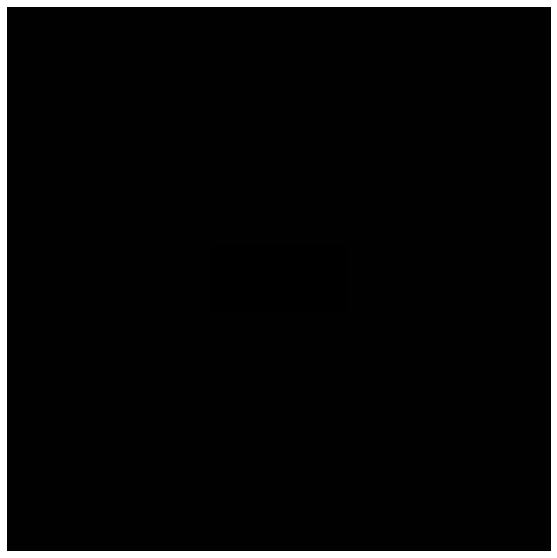

In [3]:

# #create standardized initialization buffer
# gimage = initialize_mesh(width, height, channel_no, value=1)  #100)
# #view the buffer
# plt.figure(figsize=(6, 6))
# plt.imshow(gimage.astype('uint8'))
# plt.axis('off')

In [4]:
# Image.frombuffer("L", (width, height), 1*gimage, 'raw', "L", 0, 1)
# img = Image.frombuffer("L", (512, 512), 2*gimage, 'raw', "L", 0, 1)
# pbc(gimage,512,512)
print(f"initial mean voltage is {np.mean(gimage[...,0])}.")
print(f"initial mean fast variable is {np.mean(gimage[...,1])}.")
print(f"initial mean slow variable is {np.mean(gimage[...,2])}.")

initial mean voltage is 0.03125.
initial mean fast variable is 0.96875.
initial mean slow variable is 0.3875000000000002.


# reimplement the shader in numpy

In [5]:
# abs(sum(time_step_at_pixel(txt, 0, 0)))
# pbc(gimage,512,512),

In [6]:
txt = gimage.copy()
assert ((np.isclose(pbc(gimage, 512, 512),
                    np.array([0., 0., 0.], dtype=np.float32))).any()
        )  #roughly test periodic boundary conditions
# assert((np.isclose(pbc(gimage,512,512),np.array([-0.01574451,  0.11116473,  0.02320262], dtype=np.float32))).any())  #roughly test periodic boundary conditions
assert (abs(sum(time_step_at_pixel(txt, 0, 0))) < 0.2
        )  #test time step works at a given pixel

In [7]:
dtexture_dt = np.zeros((width, height, channel_no), dtype=np.float64)
get_time_step(txt, dtexture_dt)

assert (0 < abs(np.min(dtexture_dt)))  #test that dtexture_dt was written to
assert (np.max(txt[..., 0]) >= np.max(gimage[..., 0] is not None)
        )  #test that txt was not written to

In [36]:
gimage.any()

True

In [42]:
@jit
def time_step(texture, h):
    dtexture_dt = np.zeros((width, height, channel_no), dtype=np.float64)
    get_time_step(texture, dtexture_dt)
    texture += h * dtexture_dt

assert(time_step(gimage ,0.1) is None)
assert(gimage.any())
assert(gimage[0,0].dtype    is not None)

In [50]:
#reinitialize
# txt  = gimage.copy() tme = 0
# txt = np.load('Data/buffer_test.npy')
tmo = 1
h = 0.1
for step in range(500):
    time_step(txt, h=h)
    tmo += h
print(f"number of nan pixel voltages is {np.max(sum(np.isnan(txt[...,0])))}.")
print(f"current mean voltage is {np.mean(txt[...,0])}.")
print(f"current mean fast variable is {np.mean(txt[...,1])}.")
print(f"current mean slow variable is {np.mean(txt[...,2])}.")
print(f"current time is {tme}.")

number of nan pixel voltages is 512.
current mean voltage is nan.
current mean fast variable is 0.9437823406974571.
current mean slow variable is 0.9992614056651274.


NameError: name 'tme' is not defined

In [51]:
#save canvas
# np.save(f'Data/buffer_time_origin_primed.npy', txt)
# np.save('Data/buffer_init.npy', gimage)

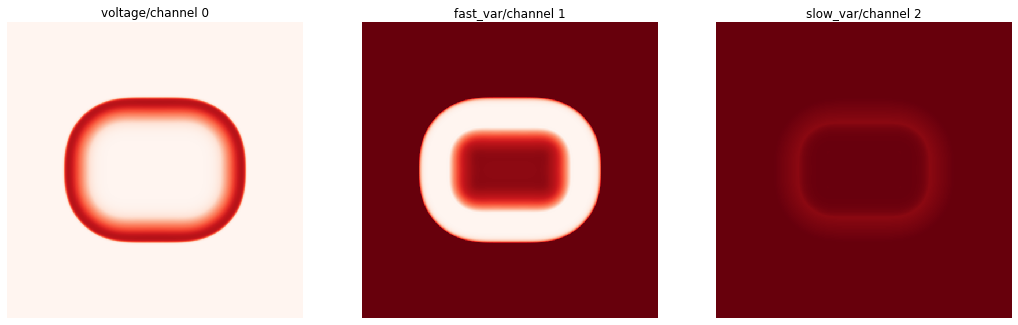

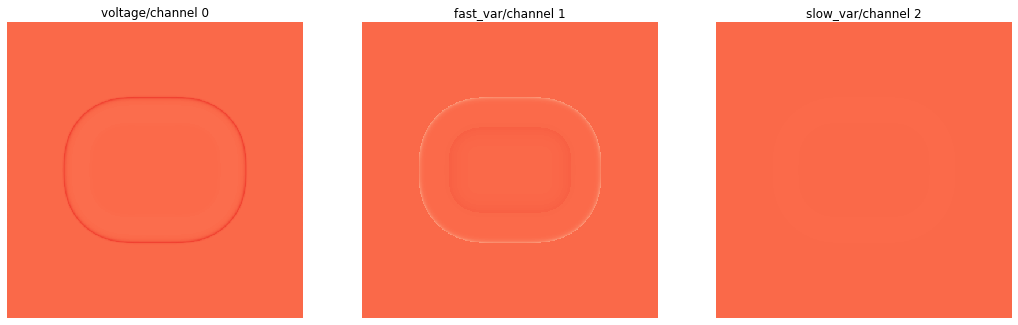

max value: 0.8220734919420856
    min value: -5.842994007759086e-09
    mean value: 0.07776932446174945
max value: 1.0
    min value: 4.2730396698647395e-07
    mean value: 0.8207531354970061
max value: 0.9999357315470903
    min value: 0.9255846617243946
    mean value: 0.9930852439857958


In [46]:
dtexture_dt = np.zeros((width, height, channel_no), dtype=np.float64)
get_time_step(txt, dtexture_dt)
display_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
display_texture(dtexture_dt, vmins=(-1, -1, -1), vmaxs=(1, 1, 1))
describe_texture(txt[..., 0])
describe_texture(txt[..., 1])
describe_texture(txt[..., 2])

In [47]:
tme


NameError: name 'tme' is not defined

In [12]:
txt[10, 10]
# time_step(txt,h=0.01) #~maximally repolarized tissue at equilibrium

array([1.76288650e-139, 1.00000000e+000, 9.93761824e-001])

In [13]:
np.max(txt)

1.0

In [14]:
# plt.figure(figsize=(6,6))
# plt.imshow(np.abs(txt[...,1]))
# plt.axis('off');

In [15]:
# plt.figure(figsize=(6,6))
# plt.imshow(np.abs(gimage))
# plt.axis('off');

In [19]:
describe_texture(dtexture_dt[..., 0])
describe_texture(dtexture_dt[..., 1])
describe_texture(dtexture_dt[..., 2])

max value: 0.20978046762179947
    min value: -0.020086308292728373
    mean value: 0.0004050928873281145
max value: 0.0506543622685071
    min value: -0.3003003003003003
    mean value: -0.0022845232335665672
max value: 0.08373588792460812
    min value: -0.001489897786717182
    mean value: 0.0022267171412359166


In [20]:
dtexture_dt[256, 256]

# def time_step(texture):
#     '''assuming width and height have the size of the first two axes fo texture'''
#     for x in range(width):
#         for y in range(height):
#             texture[y, x] = time_step_at_pixel(texture,x,y)

array([-0.0071063 ,  0.00099352,  0.05021173])

In [21]:
txt[256, 256]
# txt  = gimage
# time_step(txt,0.1)

array([0.05881514, 0.00647924, 0.44767102])

In [22]:
# time_step(txt,0.1)

# get_time_step(txt , dtexture_dt)
# txt = time_step(txt,h=0.1)

# @jit
# def time_step(texture, h):
#     for x in range(512):
#         for y in range(512):
#             texture[x,y] += h*time_step_at_pixel(texture,x,y)

# # @njit
# def time_step(texture1, texture2, h):
# 	#width  = 512
# 	#height = 512
# 	for x in range(512):
# 		for y in range(512):
# 			texture2[x,y] = time_step_at_pixel(texture1,x,y,h)

#     dtexture_dt = np.zeros((width, height, channel_no), dtype = np.float32)
#     get_time_step(texture , dtexture_dt)
#     return texture + h*dtexture_dt

it takes 600 seconds for one time step before compiling<br>
it takes 20 milliseconds for one time step after compiling<br>

In [23]:
# #view the buffer
# img = Image.frombuffer("L", (512, 512), txt, 'raw', "L", 0, 1)
# img

okay, it's running fast, but i'm overwriting the buffer with the time step
##TODO: use time_step for forward euler integration
##TODO: check if my function calls need x,y replaced with y,x
##TODO: find out how many reinits I need to get spiral tips, is this stable?
##TODO: put all of these functions into a lib with an __init__.py

For the current glitch/instability, we see something spontaneously pop out of the left-right hand side.  This leads me to believe that pbc() is causing the trouble, and it doesn't have to do with a xy to yx parity.

In [28]:
set_voltage_in_box(txt,
                   min_x=256 - 128,
                   max_x=256 - 64,
                   min_y=256 - 32,
                   max_y=256 + 32,
                   width=512,
                   height=512,
                   value=30.0)